# Sympy sympy sympy

We will continue to explore Sympy's capabilities, including:

* Calculus
* ODEs
* Converting Sympy expressions in to callable functions, to let us do things like plotting.
* Solving systems of equations. . . with and without sympy. 

* * *

### A quick aside: Jupyter notebook editing keyboard shortcuts

A complete list of keyboard shortcuts is obtained by clicking **Help -> Keyboard Shortcuts** above. 

* * *

## Back to calculus!

We left off with the *error function* also known as **erf**!

In [2]:
import sympy as sp
x = sp.Symbol('x')

f = sp.exp(-x**2)
sp.pprint(f)

fi = sp.integrate(f,x)
sp.pprint(fi)

   2
 -x 
ℯ   
√π⋅erf(x)
─────────
    2    


In [3]:
sp.erf?

This is better than no information at all. sympy is telling us that (a rescaling) of this is called the $erf$ or <a href="http://docs.sympy.org/0.7.1/modules/mpmath/functions/expintegrals.html#erf">*error function*</a>.  Sympy can work with this function. 

Whenever you need to know what a sympy (or Python) object is simply type in **object?**, for example **sp.erf?**

In [8]:
f1 = x**2 * sp.erf(x)
sp.pprint(f1)
sp.pprint(sp.Eq(sp.Integral(f1,x), sp.integrate(f1) ) )

 2       
x ⋅erf(x)
                                   2      2
⌠                 3           2  -x     -x 
⎮  2             x ⋅erf(x)   x ⋅ℯ      ℯ   
⎮ x ⋅erf(x) dx = ───────── + ─────── + ────
⌡                    3         3⋅√π    3⋅√π


We can similarly ask for definite integrals. 

We will request $\int_{-\infty}^\infty e^{-x^2} dx$ below.

In [10]:
## sp.oo "infinity"

sp.pprint( sp.Eq( sp.Integral(f, (x,-sp.oo, sp.oo)), sp.integrate( f, (x, -sp.oo, sp.oo) ) ))


∞              
⌠              
⎮     2        
⎮   -x         
⎮  ℯ    dx = √π
⌡              
-∞             


Let's also request $\int_{-1}^1 e^{-x^2} dx$

In [15]:
sp.pprint( sp.integrate(f, (x, -1, 1) ) )

√π⋅erf(1)


In [21]:
## turn to a float, with 40 decimal places of accuracy
print( sp.integrate(f, (x, -1, 1) ).evalf(40), "\n" )
## turn to a float, with 500 decimal places of accuracy
print( sp.integrate(f, (x, -1, 1) ).evalf(500) )

1.493648265624854050798934872263706010709 

1.4936482656248540507989348722637060107089993736252126580553089979172106551235456629956968596458038394612379080341789426989961942629820973252547042939643595591887162961984586632016694254179698256101072779016659197846430253610865976956875286279199159199570084210307282364270958784255618107798113917613329043975485964397426798044233806000568376037627188403742631022094314478433648148466359248221643456082167197854087951217869469822883611849198924258207091626476084051514729961305531401612093311498886407


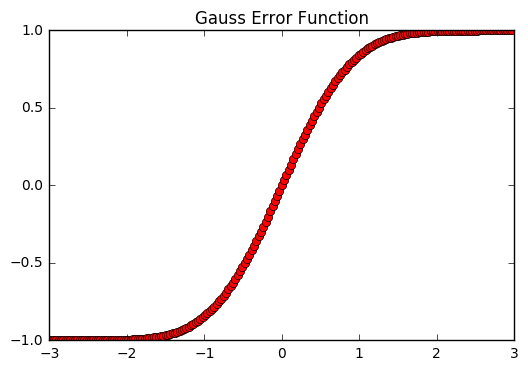

In [34]:
## let's plot erf.

import matplotlib.pyplot as plt
%matplotlib inline

erf = sp.lambdify(x, sp.erf(x), "math")
## lambdify command takes sympy algebraic expressions and converts into 
## callable functions

npts = 200
xdom = [-3.0 + 6.0*i/npts for i in range(npts)]
yval = [erf(xi) for xi in xdom]

plt.plot(xdom, yval, 'ro') ## r- describes the "pen"
plt.title("Gauss Error Function")

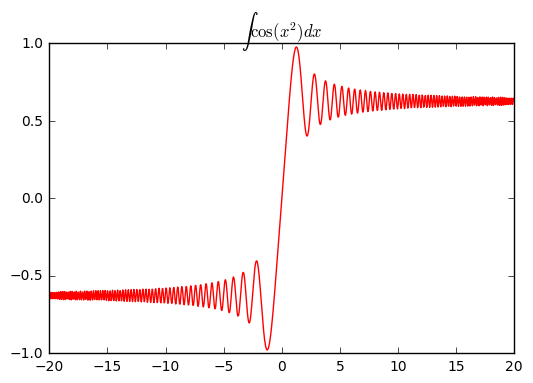

In [45]:
## let's try the same but for the anti-derivative of 
## cos(x^2)

asx = sp.lambdify(x, sp.integrate(sp.cos(x**2), x), "mpmath")
## lambdify worked fine

npts = 1000
xdom = [-20 + 40*i/npts for i in range(npts)]
yval = [asx(xi) for xi in xdom]

plt.plot(xdom, yval, 'r-')
plt.title("$\int \cos(x^2) dx$") ## latex title

In [56]:
F = sp.integrate(sp.cos(x**2), x)
print(type(F))
print(F.args)
sp.pprint(F)
#sp.fresnelc?
print(F.args[-1]) ## last element in list
#sp.gamma?

<class 'sympy.core.mul.Mul'>
(1/8, sqrt(2), sqrt(pi), 1/gamma(5/4), fresnelc(sqrt(2)*x/sqrt(pi)), gamma(1/4))
              ⎛√2⋅x⎞       
√2⋅√π⋅fresnelc⎜────⎟⋅Γ(1/4)
              ⎝ √π ⎠       
───────────────────────────
          8⋅Γ(5/4)         
gamma(1/4)


In [ ]:
sp.pprint(sp.limit(F, x, sp.oo))

In [61]:
## let's try to find something that stumps sympy

#sp.pprint( sp.integrate(F, x) )

#sp.pprint( sp.integrate( sp.integrate( sp.exp(-x**2), x ), x) )

sp.pprint( sp.integrate( sp.exp( sp.exp(-x**2) ) , x) )
## when you get beyond sympy's capabilities, it repeats your request!


⌠           
⎮  ⎛   2⎞   
⎮  ⎜ -x ⎟   
⎮  ⎝ℯ   ⎠   
⎮ ℯ       dx
⌡           



i.e. when sympy fails on these kinds of requests, it **gives up** and returns your original input, *unchanged*. 

What is going on *under the hood* is that sympy is using something called the <a href="https://en.wikipedia.org/wiki/Risch_algorithm">**Risch algorithm**</a>. Technically sympy has developed an extension of the Risch algorithm. . . and sympy's extension what is known as a *semi-algorithm*.  As far as I am aware, every software package that can compute symbolic integrals (Mathematical, Matlab, Maple, etc) all use variants of the Risch algorithm, which similarly boils-down to a careful application of <a href="https://en.wikipedia.org/wiki/Liouville%27s_theorem_(differential_algebra)">Liouville's Theorem in differential algebra</a>. 

The **Liouville Theorem** states that if $f(x)$ has an anti-derivative that is *elementary* (a sum, product, quotient, or composite of functions involving exponential or logarithm, polynomials or trig functions *recursively*) then there is and expression for the function $F$ with $F'=f$ of the form:

$$ F(x) = v(x) + \sum_{i=1}^n c_i \ln(g_i(x)) $$

where $v(x)$ and the functions $g_1(x),\cdots,g_n(x)$ are elementary function expressible entirely in terms of sums, product, and quotients of $f(x)$, and polynomials.  

* * *

**eg:** $$\frac{e^{x^2+2}+2}{\ln(x)+x^8+\sin(e^x+x^2)} \hskip 1cm \text{ and } \hskip 1cm \cos\left(\frac{1}{1 + \tan\left(\frac{1}{\sin(x) + e^x}\right)}\right)$$
are elementary functions. 

**eg:** It is a fact that functions such as
$$\int e^{-x^2} dx \hskip 1cm \text{ and } \hskip 1cm \int \sin(x^2) dx $$
are **not** elementary.  

* * *

The Risch algorithm goes one step further and reduces the number of possibilities one has to consider to a finite number.  In Risch's original paper he confined himself to a fairly simple class of elementary functions on which his work provides a genuine algorithm. Sympy, on the other hand, has looser constraints than Risch's original paper and so it does not know how to solve this problem for every possible input. Sympy **can fail**, which is why it is called a semi-algorithm.

When you provide sympy with a *difficult* integral that it does not know how to handle immediately, it spends some time *searching* for an answer, but if it does not find one quickly it gives up. 

Sympy's extensions to the Risch algorithm are some of the most commonly-used anti-derivatives, such as $erf$ and the Fresnel function.

* * *

# Asking sympy to solve equations

Sympy has some fairly sophisticated algorithms to solve polynomial equations. It uses this intelligence for solving polynomial equations to build tools to solve (symbolically) a wide array of equations, even ones that are not polynomial. 

Sympy can:

 * Factor polynomials.
 * Find roots of polynomials, symbolically as well as numerically. 
 * Solve (symbolically as well as numerically) simultaneous polynomial equations.
 * Solve simultaneous equations that are not polynomial
     - sympy can *sometimes* do this symbolically
     - can usually do this numerically, using a variety of methods, including the multi-variable Newton's method.  The numeric methods are not always guanteed to find all solutions. If you *need* all solutions you might have to use more specialized methods. 
 * Sympy's polynomial equation solvers, on the other hand, will always find good approximations to all the solutions of a single-variable polynomial.

In [63]:
p = x*x - 2
sp.pprint(sp.solve(p,x))
## find solutions to p(x) = 0 

p = x*x + 2
sp.pprint(sp.solve(p,x))

[-√2, √2]
[-√2⋅ⅈ, √2⋅ⅈ]


In [66]:
a,b,c = sp.symbols('a b c')
p = a*x**2 + b*x + c

sp.pprint(sp.solve(p,x))

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


In [ ]:
a,b,c,d = sp.symbols('a b c d')
p = a*x**3 + b*x**2 + c*x + d
sp.pprint(sp.solve(p,x))

In [ ]:
a,b,c,d,e = sp.symbols('a b c d e')
p = a*x**4 + b*x**3 + c*x**2 + d*x + e
sp.pprint(sp.solve(p,x))

In [69]:
a,b,c,d,e,f = sp.symbols('a b c d e f')
p = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
sp.pprint(sp.solve(p,x))

[]


In [ ]:
p = x**3 + x**2 - x - 1
print(type(sp.Poly(p,x)))
P = sp.Poly(p,x).coeffs()
print(P)

In [78]:
import mpmath as mp
import numpy as np
mp.mp.pretty = True
## polyroots -- finds approximations to the roots
##  uses a version of Newton's method
mp.polyroots(P)

[1.0, (-1.0 - 1.25049450131375e-10j), (-1.0 + 1.2799322008877e-10j)]

In [81]:
sp.pprint(sp.simplify(p / (x-1)))
sp.pprint(sp.expand((x-1)*(x+1)*(x+1)))

 2          
x  + 2⋅x + 1
 3    2        
x  + x  - x - 1



### sympy solve

The general format is to call $solve(f,x)$ where $f$ is a sympy expression -- a function -- and $x$ is the variable used by that function.  Sympy will attempt to find all the solutions to the equation
$$f(x) = 0$$

The solve algorithm runs out of steam fairly quickly. For example:


In [103]:
f = [lambda x,y: x**2 + y**2 - 4, lambda x,y: x*y-1.0]
## list of functions 
roots = mp.findroot(f, (0.2, 0.1) )
print(roots)
print(f[0](roots[0], roots[1]), f[1](roots[0], roots[1]) )
## mpmath findroot algorith is pretty much just Newton's method
## 

[ 1.93185165257814]
[0.517638090205042]
0.0 0.0


$$ f : \mathbb R^n \to \mathbb R^n $$

want to solve $f(\vec x) = \vec 0$

Inital guess $\vec p$, linearization of $f$ at $\vec p$

$$f(\vec p + \vec h) \simeq f(\vec p) + Df_{\vec p}(\vec h)$$

Solve $$f(\vec p) + Df_{\vec p}(\vec h) = \vec 0$$

$$\vec h = Df_{\vec p}^{-1}(-f(\vec p))$$

Newton's method is the process
$$\vec p \to \vec p - Df_{\vec p}^{-1}(f(\vec p))$$

In [101]:
x,y = sp.symbols('x y')
sol =  sp.solve([x**2+y**2-4, x*y-1])
for S in sol:
    sp.pprint(S)
print(type(sol[0]))
sp.pprint(sol[0][x]) ## tell me the x-value of the solution[0]. 
## sympy is giving us **all** the solutions 
## mpmath is giving us only one. 

⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭
⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭
⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭
⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭
<class 'dict'>
⎛       _________⎞   _________ ⎛    _________    ⎞
⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠


In [105]:
print("MPMATH sol: ", roots[0],roots[1] )
for S in sol:
    print(S[x].evalf(8), S[y].evalf(8))

MPMATH sol:  1.93185165257814 0.517638090205042
-1.9318517 -0.51763809
1.9318517 0.51763809
-0.51763809 -1.9318517
0.51763809 1.9318517


## roots

The sympy *polyroots* and numpy *roots* functions are guanteed to find all the solutions of your single-variable polynomial equation.  

* * * 

While we're at it, notice mpmath can be used to solve multi-variable equations.

Here we ask mpmath to solve
$$(x^2+y^2, xy) = (4, 1)$$

It is using a multi-variable Newton method.